## Convolutional Neural Networks
#### Training a convolutional neural network to classify images to the particular article of clothing type

In [4]:
import tensorflow as tf

In [6]:
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Categories:
##### 0-T-shirt/top
##### 1-Trouser
##### 2-Pullover
##### 3-Dress
##### 4-Coat
##### 5-Sandal
##### 6-Shirt
##### 7-Sneaker
##### 8-Bag
##### 9-Ankle boot

#### Shaping the data to the appropriate shape for a CNN

In [9]:
x_train = x_train.reshape(60000,28,28,1)

In [10]:
x_test = x_test.reshape(10000,28,28,1)

#### Building and training the model

In [12]:
i = tf.keras.layers.Input(shape = x_train[0].shape)
x = tf.keras.layers.Conv2D(32,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(i)
x = tf.keras.layers.Conv2D(64,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(x)
x = tf.keras.layers.Conv2D(128,  kernel_size = (3, 3), strides = 2, activation = "relu", padding = "same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation = "relu")(x)
x = tf.keras.layers.Dense(10, activation = "softmax")(x)
model = tf.keras.models.Model(i, x)


In [13]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

In [14]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 26s 435us/sample - loss: 0.4464 - acc: 0.8510 - val_loss: 0.3610 - val_acc: 0.8711
Epoch 2/2
60000/60000 [==============================] - 24s 402us/sample - loss: 0.2921 - acc: 0.8940 - val_loss: 0.3276 - val_acc: 0.8829


#### Evaluating the model

[[910   1  14  11   2   2  55   0   5   0]
 [  1 977   0  13   3   0   6   0   0   0]
 [ 29   2 832   4  86   0  47   0   0   0]
 [ 55   1   7 843  68   0  24   0   2   0]
 [  1   2 120   6 825   0  45   0   1   0]
 [  0   0   0   0   0 977   0  16   0   7]
 [214   2  91  21  71   0 593   0   8   0]
 [  0   0   0   0   0  13   0 980   0   7]
 [  4   1   2   2   5   8   6   2 970   0]
 [  0   0   0   0   0  10   0  67   1 922]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.78      0.83      0.81      1000
           3       0.94      0.84      0.89      1000
           4       0.78      0.82      0.80      1000
           5       0.97      0.98      0.97      1000
           6       0.76      0.59      0.67      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.99     

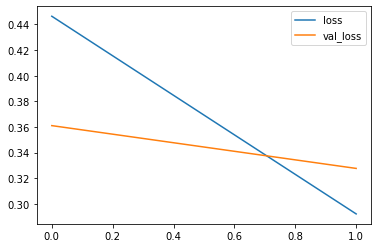

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, np.argmax(model.predict(x_test),axis=-1)))
print(classification_report(y_test, np.argmax(model.predict(x_test),axis=-1)))

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

##### Model history is a straight line because the model ran for 2 epochs

#### Displaying a random misclassified image from our model


In [16]:
misclassified_images = np.where(y_test!= np.argmax(model.predict(x_test),axis=-1))[0]
misclassified_images.shape

(1171,)

In [17]:
randi= np.random.choice(misclassified_images)
print(randi)
len(y_test)

5740


10000

Text(0.5, 1.0, 'True label: Dress, Predicted Label: Coat')

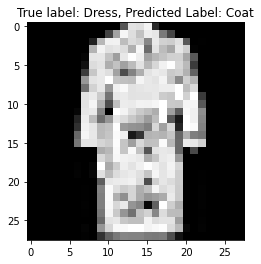

In [22]:
plt.imshow(x_test[randi].reshape(28,28), cmap = 'gray')
index_label = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3:"Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
plt.title(f"True label: {index_label[y_test[randi]]}, Predicted Label: {index_label[np.argmax(model.predict(x_test), axis=-1)[randi]]}")